In [3]:
import tensorflow as tf
from tensorboard import program

log_dir = "./home/vicevil/Documentos/graficas/logs"
tb=program.TensorBoard()
tb.configure(argv=[None, '--logdir', log_dir])
url = tb.launch() #  lanza TensorBoard en el navegador

import tensorboard

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,f1_score,precision_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2, l1, l1_l2
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import regularizers
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
import networkx as nx
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau




# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [6]:

df=pd.read_csv(r"/home/vicevil/Documentos/df_malware_unido_solo_cat_y_escalar.csv")

In [ ]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_unido_solo_cat_y_escalar.csv")

In [7]:
df.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'dia_semanal', 'Target'],
      dtype='object')

In [8]:
cat= ['proto','conn_state','id.resp_h']
num=[  'missed_bytes', 'id.orig_p','id.resp_p','orig_pkts', 'orig_ip_bytes','resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora','dia_semanal']
Target="Target"

ESTUDIAMOS CORRELACIONES DEL DATASET

In [9]:
correlacion=np.abs(df.corr().sort_values(by="Target", ascending=False))

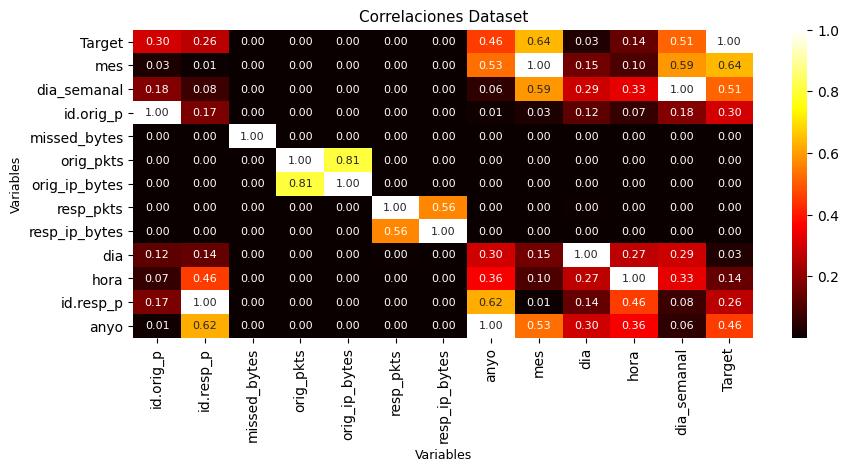

In [18]:
plt.figure(figsize=(10,4))
sns.heatmap(correlacion, annot=True,annot_kws={"fontsize": 8}, cmap="hot", fmt=".2f")
plt.title("Correlaciones Dataset",fontsize=11)
plt.xlabel("Variables",fontsize=9)
plt.ylabel("Variables",fontsize=9)
plt.show()

1. Se va a proceder a eliminar las variables siguientes:
    - DIA.- Presenta un valor de correlación de 0.27 igual que hora, quedandonos con este ultimo, debido a que es mas interesante conocer el intervalo horario de los ataques.
    - RESP_IP_BYTES y ORIG_IP_BYTES.- Tienen un valor de 0.56, idéntico a RESP_PKTS y ORIG_PKTS, siendo estas últimas más interesantes, ya que acumulan los paquetes de datos que pueden contener malware, y las que se eliminan sólo tiene los bytes enviados.

In [20]:
df.drop(columns={"dia","resp_ip_bytes", "orig_ip_bytes"}, inplace=True)

Columna: |	Descripción: |	Tipo: |	Orden de entrada: |	Información posterior a la etiqueta "label"|
-|-|-|-|-|
id.orig_p|	Identificador único del puerto de origen|	Categórico|	1|	No
id.resp_h|	Identificador único del host de destino	|Categórico	 |2	 |No
id.resp_p|	Identificador único del puerto de destino|	Categórico|	3|	No
orig_pkts|	Número de paquetes enviados por el host de origen|	Numérico|	4|	No
resp_pkts|	Número de paquetes recibidos por el host de destino	|Numérico|	5|	No
proto|	Protocolo utilizado (TCP, UDP, ICMP, etc.)|	Categórico|	6|	No
conn_state|	Estado de la conexión (SYN, ACK, FIN, etc.)|	Categórico|	7	|No
anyo|	Año de la conexión|	Numérico|	8|	No
mes|	Mes de la conexión|	Numérico|	9|	No
dia|	Día de la conexión|	Numérico|	10|	No
hora|	Hora de la conexión|	Numérico|	11|	No
dia_semanal|	Día de la semana de la conexión	|Categórico|	12|	No
Target|	Etiqueta que indica si la conexión es normal o anómala|	Categórica|13	| Target

## MACHINE LEARNING Y  DEEP - LEARNING


1. PROBAMOS UN RANDONFOREST DE ML

In [27]:
df_rf= df.copy()

TECNICAS DE ESCALADOS USADAS LABELENCONDER Y MINMAXSCALER 

In [ ]:
 #Itera sobre las columnas categóricas(LABEL-ENCONDER)
for col in df.columns[df.dtypes == 'object']:  
    cat = LabelEncoder()
    df[col] = cat.fit_transform(df[col]) 

In [ ]:
#minmax redodenando a numeros enterros 0 y 1
columnas_numericas = df.drop(["Target"], axis=1).select_dtypes(include=['number'])
#instacio
scaler = MinMaxScaler()

# Escalo datos
col_num_scal = scaler.fit_transform(columnas_numericas)

# rangos que queremos
rango_deseado_min = 0
rango_deseado_max = 1

# Multiplica los datos x los rangos
col_num_scal_rangos= col_num_scal * (rango_deseado_max - rango_deseado_min) + rango_deseado_min

# Redondea los datos escalados rescalados al entero más cercano
col_num_scal_round = pd.DataFrame(col_num_scal_rangos).round().astype(int)

# Concatena los datos rescalados enteros con la columna "Target" y el resto del DataFrame original
df = pd.concat([df["Target"], col_num_scal_round], axis=1)


In [ ]:
#minmax sin redondear
scaler= MinMaxScaler()
array_sca=scaler.fit_transform(df)


APLICAMOS PARA RF LABELENCODER Y MINMAX SIN REDONDEO

In [28]:
 #Itera sobre las columnas categóricas(LABEL-ENCONDER)
for col in df_rf.columns[df_rf.dtypes == 'object']:  
    cat = LabelEncoder()
    df_rf[col] = cat.fit_transform(df_rf[col]) 
    

In [29]:
#minmax sin redondear
scaler= MinMaxScaler()
array_sca=scaler.fit_transform(df_rf)

In [30]:
df_sca=pd.DataFrame(array_sca)

In [32]:
df_sca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.786206,0.836806,0.000351,0.5,0.5,0.0,4.543571e-08,0.0,0.0,0.363636,0.652174,0.333333,0.0
1,0.859159,0.829254,0.000351,0.5,0.5,0.0,1.514524e-08,0.0,0.0,0.363636,0.652174,0.333333,0.0
2,0.627161,0.062841,0.000351,0.5,0.5,0.0,1.514524e-08,0.0,0.0,0.363636,0.652174,0.333333,0.0
3,0.929351,0.170226,0.000351,0.5,0.5,0.0,4.543571e-08,0.0,0.0,0.363636,0.652174,0.333333,0.0
4,0.675990,0.959768,0.000351,0.5,0.5,0.0,1.514524e-08,0.0,0.0,0.363636,0.652174,0.333333,0.0


SPLIT RF 

In [33]:
X=df_sca.iloc[:,0:12]
y=df_sca.iloc[:,12]

In [36]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
# Definir el modelo Random Forest
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3246823
         1.0       1.00      1.00      1.00   1755378

    accuracy                           1.00   5002201
   macro avg       1.00      1.00      1.00   5002201
weighted avg       1.00      1.00      1.00   5002201



In [39]:
df.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'orig_pkts', 'resp_pkts', 'anyo', 'mes', 'hora',
       'dia_semanal', 'Target'],
      dtype='object')

In [38]:
importancia=model.feature_importances_

In [41]:
importancia.shape

(12,)

In [43]:
columnas=['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'orig_pkts', 'resp_pkts', 'anyo', 'mes', 'hora',
       'dia_semanal']

In [44]:
df_importancia = pd.DataFrame({"importancia":importancia,"Columnas":columnas})

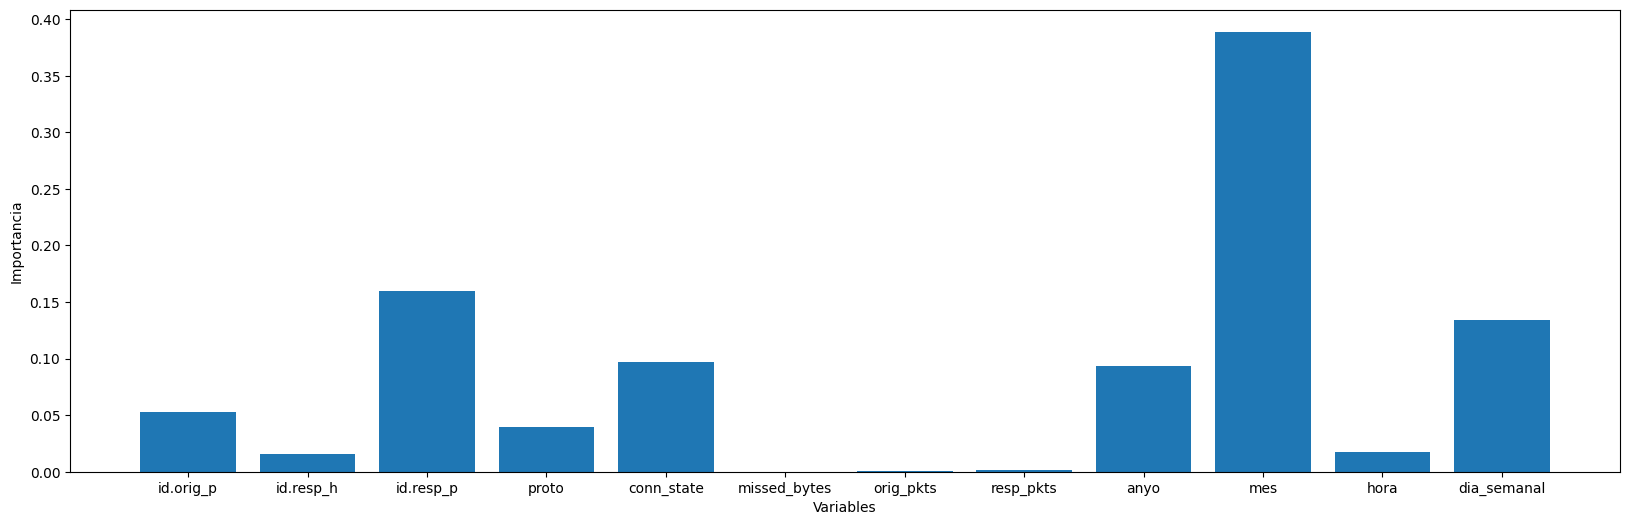

In [45]:
plt.figure(figsize=(20,6))
plt.bar(df_importancia['Columnas'], df_importancia['importancia'])
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.show()

VAMOS A REALIZAR UN SUBMUESTREO DE LA CLASE MALICIOUS QYE ES LA MAYORITARIA PARA CONSEGUIR UN BALANCEO.- SE BALANCEA EL DATASET COMPLETO, DEJANDO LA TRAGET 50/50, PERO PERDIENDO UN 30% DE LOS DATOS, Y AL PASARLE LA RED NEURONAL, NO PASA DEL 0.5 DE ACCURANCY ---- **DESASTRE EL df_malware_TOTAL_target_balanc**

In [46]:
df.Target.value_counts()

0    16230845
1     8780158
Name: Target, dtype: int64

In [47]:
# Aplica submuestro, ya que la clase minoritaria la ingle yo con datos de la misma columna
X = df.drop('Target', axis=1)  
y = df['Target']    

sampling_strategy="majority"#solo submuestre la clase mayoritaria

ros = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print(y_resampled.value_counts())

0    8780158
1    8780158
Name: Target, dtype: int64


In [48]:
# Crea una columna temporal
df_temp = pd.concat([X_resampled, y_resampled], axis=1)

# Re-indexa el dataframe
df_temp = df_temp.reset_index(drop=True)  

In [49]:
df_temp.shape

(17560316, 13)

<AxesSubplot:xlabel='Target', ylabel='Count'>

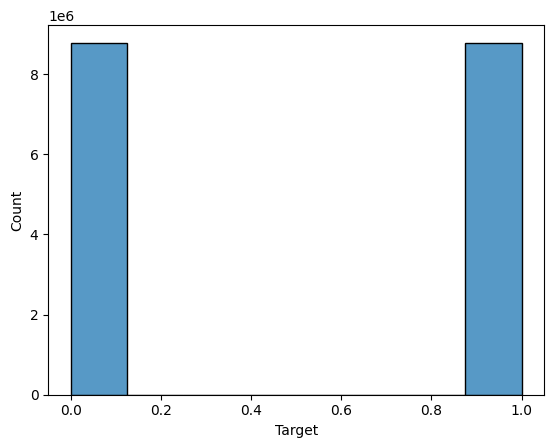

In [50]:
sns.histplot(df_temp.Target, bins=8)

In [54]:
df_temp

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,orig_pkts,resp_pkts,anyo,mes,hora,dia_semanal,Target
0,33355.0,169.46.134.213,23.0,tcp,S0,0.0,1.0,0.0,2018,5,4,5,0
1,57682.0,54.39.87.104,992.0,tcp,RSTOS0,0.0,3.0,0.0,2018,12,10,5,0
2,25136.0,162.248.88.215,62336.0,tcp,OTH,0.0,0.0,0.0,2019,9,22,4,0
3,65269.0,118.49.48.152,81.0,tcp,S0,0.0,1.0,0.0,2018,7,13,2,0
4,51828.0,160.146.187.178,23.0,tcp,S0,0.0,6.0,0.0,2019,2,19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560311,123.0,89.221.218.101,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
17560312,123.0,89.221.210.188,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
17560313,123.0,212.111.30.190,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
17560314,123.0,5.1.56.123,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1


APLICO LABERLENCONDER Y MIXMAX

In [55]:
 #Itera sobre las columnas categóricas(LABEL-ENCONDER)
for col in df_temp.columns[df_temp.dtypes == 'object']:  
    cat = LabelEncoder()
    df_temp[col] = cat.fit_transform(df_temp[col]) 

In [56]:
    #minmax sin redondear
scaler= MinMaxScaler()
array_sca=scaler.fit_transform(df_temp)

In [58]:
df_sca=pd.DataFrame(array_sca)

In [60]:
df_sca.shape

(17560316, 13)

SPLIT

In [65]:
X=df_sca.iloc[:,0:12]
y=df_sca.iloc[:,12]

<AxesSubplot:xlabel='12', ylabel='Count'>

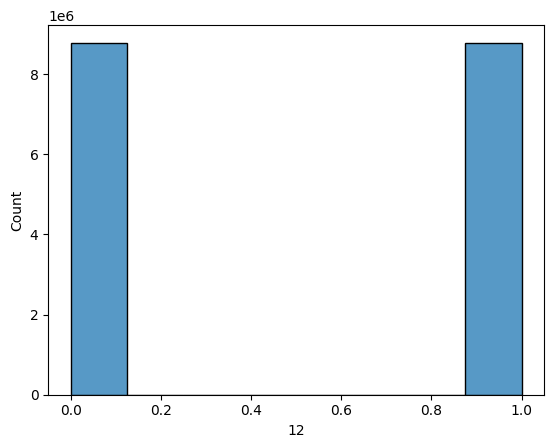

In [64]:
sns.histplot(df_sca.iloc[:,12], bins=8)

In [66]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


MODELO MACHINE LEARENING LOGISTICREGRESSION

In [68]:
# Definir el modelo logisctic con C para regule el sobreajutes y la funcion sag q es adecuado con muchos datos
model = LogisticRegression(C=10, solver="sag")

# Entrenar el modelo
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(classification_report(y_pred, y_test))

/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1767838
         1.0       0.99      1.00      0.99   1744226

    accuracy                           0.99   3512064
   macro avg       0.99      0.99      0.99   3512064
weighted avg       0.99      0.99      0.99   3512064



UTILIZANDO TECNICAS DE MACHINE LEARNING TANTO, DESBALANCEADO O BALANCEADA LA TARGET, CON RANDONFOREST Y LOGISTICREGRESION, LOS RESULTADO SOSN MUY BUENOS, PERO PUDIERA HABER UN SOBREAJUSTE, AUNQUE AL LOGISTICREGRESSION SE LE APLICADO UN VALOR MUY AL TO DE C PARA CONTENER EL SOBREAJUSTE, QUIZAS SEA UN MODELO PERFECTO, PERO VAMOS A PROBAR CON TECNICAS DE DEEP LEARNING

CONTINUAMOS EN NOTEBOOK MALWARE_1_3